In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import (make_scorer,
                             roc_auc_score,
                             roc_curve,
                             f1_score,
                             recall_score,
                             precision_score,
                             precision_recall_curve,
                             classification_report,
                             plot_confusion_matrix,
                             plot_roc_curve)
import matplotlib.pyplot as plt
%matplotlib inline

seed = 36

In [ ]:
train = pd.read_csv('../data/notebook_produced_3/train.csv')

train.head()

In [ ]:
X = train.drop(columns='y')
y = train.y

## Grid search for the best model to use

In [ ]:
# names = [
#     'logistic_reg',
#     'knn',
#     'decision_tree',
#     'random_forest',
#     'grad_boost',
#     'ada_boost'
# ]

# models = [
#     LogisticRegression(solver='saga', fit_intercept=True, max_iter=1000, random_state=seed),
#     KNeighborsClassifier(),
#     DecisionTreeClassifier(random_state=seed),
#     RandomForestClassifier(random_state=seed),
#     GradientBoostingClassifier(random_state=seed),
#     AdaBoostClassifier(random_state=seed)
# ]

# param_grid = [
#     {
#         'penalty': ['l1', 'l2'],
#         'C': [.1, .5, 1., 1.5, 2]
#     },
#     {
#         'n_neighbors': [1, 3, 5, 7],
#         'metric': ['manhattan', 'euclidean', 'jaccard']
#     },
#     {
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [5, 15, 30, None]
#     },
#     {
#         'n_estimators': [100, 200, 300],
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [30, 50, None]
#     },
#     {
#         'learning_rate': [.1, .5, 1.],
#         'n_estimators': [300, 500],
#         'max_depth': [3, 8]
#     },
#     {
#         'n_estimators': [10, 50, 100],
#         'learning_rate': [.5, 1., 1.5]
#     }
# ]

# for name, model, params in zip(names, models, param_grid):
#     clf = GridSearchCV(
#                 model,
#                 params,
#                 scoring='roc_auc',
#                 cv=5,
#                 n_jobs=-1
#             )
#     clf.fit(X, y)
#     print(name)
#     print(clf.best_score_)
#     print(clf.best_params_)
#     print('------------------------------')

In [ ]:
# logistic_reg
# 0.7543330036010423
# {'C': 0.1, 'penalty': 'l2'}
# ------------------------------
# knn
# 0.7914429160608701
# {'metric': 'manhattan', 'n_neighbors': 7}
# ------------------------------
# decision_tree
# 0.8378912734108533
# {'criterion': 'entropy', 'max_depth': 30}
# ------------------------------
# random_forest
# 0.8460280605880222
# {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
# ------------------------------
# grad_boost
# 0.8520771463668148
# {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}
# ------------------------------
# ada_boost
# 0.8054061181008842
# {'learning_rate': 1.5, 'n_estimators': 100}
# ------------------------------

In [6]:
def tp_tn_fn_fp(true_value, predicted_value):
    tp, tn, fn, fp = 0, 0, 0, 0
    for v, p in zip(true_value, predicted_value):
        if v == p:
            if v+p == 2: tp += 1
            else: tn += 1
        elif v == 1: fn += 1
        else: fp += 1
    return tp, tn, fn, fp

def lift_score(true_value, predicted_value):
    tp, tn, fn, fp = tp_tn_fn_fp(true_value, predicted_value)
    return ( tp/(tp+fp) ) / ( (tp+fn) / (tp+tn+fp+fn) )

lift_scorer = make_scorer(lift_score)

In [ ]:
models = [
    RandomForestClassifier(random_state=seed)
]

param_grid = [
    {
        'n_estimators': [100, 200, 300],
        'criterion': ['gini', 'entropy'],
        'max_depth': [30, 50, None]
    }
]


clf = GridSearchCV(
            models[0],
            param_grid[0],
            scoring='roc_auc',
#             scoring={
#                 'roc_auc': make_scorer(roc_auc_score),
#                 'lift_score': lift_scorer
#             },
            cv=5,
            n_jobs=-1
        )
clf.fit(X, y)

print(clf.best_score_)
print(clf.best_params_)

# models = [
#     RandomForestClassifier(random_state=seed)
# ]

# param_grid = [
#     {
#         'n_estimators': [100, 200, 300],
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [30, 50, None]
#     }
# ]


# clf = GridSearchCV(
#             models[0],
#             param_grid[0],
# #             scoring='roc_auc',
#             scoring={
#                 'roc_auc': make_scorer(roc_auc_score),
# #                 'lift_score': lift_scorer
#             },
#             cv=5,
#             n_jobs=-1,
#             refit='roc_auc'
#         )
# clf.fit(X, y)

# print(clf.best_score_)
# print(clf.best_params_)

In [ ]:
r = clf.cv_results_
for i in r.keys():
    print(i)

In [ ]:
print(classification_report(y, clf.predict(X)))

# holdout data

In [2]:
test = pd.read_csv('../data/notebook_produced_3/test.csv')

test.head()

,y,job_retired,job_student,default_unknown,contact_cellular,contact_telephone,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_success,pdays,previous,emp_var_rate,euribor3m,nr_employed,cons_price_idx,cons_conf_idx
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.1,4.857,5191.0,0.93994,-36.4
1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1.1,4.857,5191.0,0.93994,-36.4
2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.1,4.857,5191.0,0.93994,-36.4
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.1,4.857,5191.0,0.93994,-36.4
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.1,4.857,5191.0,0.93994,-36.4


In [3]:
X_holdout = test.drop(columns='y')
y_holdout = test.y

In [7]:
print(classification_report(y_holdout, clf.predict(X_holdout)))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     10964
           1       0.37      0.45      0.41      1392

    accuracy                           0.85     12356
   macro avg       0.65      0.68      0.66     12356
weighted avg       0.87      0.85      0.86     12356



In [8]:
clf.score(X_holdout, y_holdout), roc_auc_score(y_holdout, clf.predict(X_holdout))

(0.720059241687529, 0.6763907584697254)

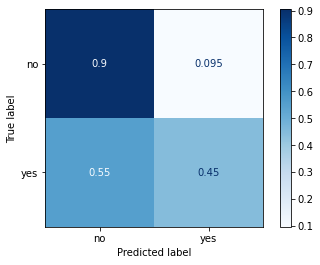

In [9]:
plot_confusion_matrix(clf, X_holdout, y_holdout,
                      display_labels=['no', 'yes'],
                      cmap=plt.cm.Blues,
                      normalize='true'
                     );

In [10]:
lift_score(y_holdout, clf.predict(X_holdout))

3.314719659918694

In [4]:
import joblib

In [ ]:
# joblib.dump(clf, '../saved_models/random_forest_feature_selected.joblib')

In [5]:
clf = joblib.load('../saved_models/random_forest_feature_selected.joblib')

In [47]:
y_probs = clf.predict_proba(X_holdout)[:,1]
y_pred = clf.predict(X_holdout)

In [170]:
res = pd.DataFrame(np.column_stack((y_holdout, y_probs, y_pred)),
                   columns=['target', 'probability', 'prediction'])
res['decile_group'] = pd.qcut(res.probability, 10, labels=['dec 1', 'dec 2', 'dec 3', 'dec 4', 'dec 5', 'dec 6', 'dec 7', 'dec 8', 'dec 9', 'dec 10'])


In [171]:
import seaborn as sns

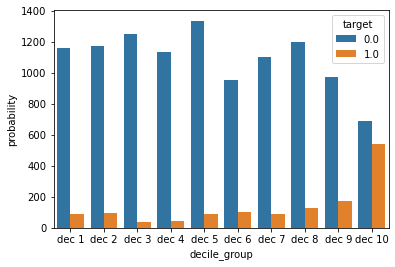

In [172]:
g = res.groupby(['decile_group', 'target']).count()
sns.barplot(data=g.reset_index(), x='decile_group', y='probability', hue='target');

In [173]:
population = res.target.value_counts()
population_ratio = population.loc[1.0]/population.sum()

l = []
for dec_group in res.decile_group.unique():
    dec = res.loc[res.decile_group==dec_group, :]
    sample = dec.target.value_counts()
    sample_ratio = sample.loc[1.0]/sample.sum()
    l.append([dec_group, sample_ratio/population_ratio])
deciles = pd.DataFrame(l, columns=['decile', 'lift'])

In [174]:
l = []
for i in np.arange(0, 1, .1):
    d = res.loc[res.probability >= i,:]
    sample = d.target.value_counts()
    sample_ratio = sample.loc[1.0]/sample.sum()
    l.append([round(i, ndigits=1), sample_ratio/population_ratio])
above_prob = pd.DataFrame(l, columns=['above_probability', 'lift'])

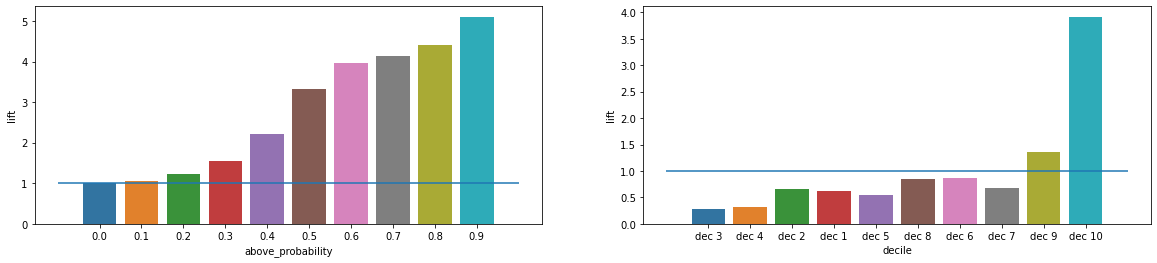

In [175]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,4))
sns.barplot(data=above_prob, x='above_probability', y='lift', ax=ax1)
sns.barplot(data=deciles, x='decile', y='lift', ax=ax2)
ax1.hlines(1, -1, 10)
ax2.hlines(1, -1, 10);

In [188]:
test.loc[:, 'job_retired':].head()

,job_retired,job_student,default_unknown,contact_cellular,contact_telephone,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_success,pdays,previous,emp_var_rate,euribor3m,nr_employed,cons_price_idx,cons_conf_idx,y_pred,y_probs
0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.1,4.857,5191.0,0.93994,-36.4,0,0.177887
1,0,0,1,0,1,0,0,1,0,0,0,0,0,1.1,4.857,5191.0,0.93994,-36.4,0,0.183234
2,0,0,0,0,1,0,0,1,0,0,0,0,0,1.1,4.857,5191.0,0.93994,-36.4,0,0.177887
3,0,0,0,0,1,0,0,1,0,0,0,0,0,1.1,4.857,5191.0,0.93994,-36.4,0,0.177887
4,0,0,0,0,1,0,0,1,0,0,0,0,0,1.1,4.857,5191.0,0.93994,-36.4,0,0.177887
